In [1]:
#LIBRERIAS
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import kaleido
import plotly.io as pio
pio.kaleido.scope.plotlyjs = r'C:\Tools\venv\test\Lib\site-packages\plotly\package_data\plotly.min.js'
import plotly.express as px

In [6]:
#Cargamos dataset y transformamos las temporadas en datetime
globales_nba = pd.read_csv('../data/raw/globales_nba.csv', encoding='ISO-8859-1', sep=",", index_col=0)
globales_nba['Season'] = globales_nba['Season'].str[0:4]
globales_nba['Season']= pd.to_datetime(globales_nba['Season'])
globales_nba.columns

Index(['Season', 'Lg', 'Age', 'Ht', 'Wt', 'G', 'MP', 'FG', 'FGA', '3P', '3PA',
       'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '3P%', 'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA',
       'ORtg'],
      dtype='object')

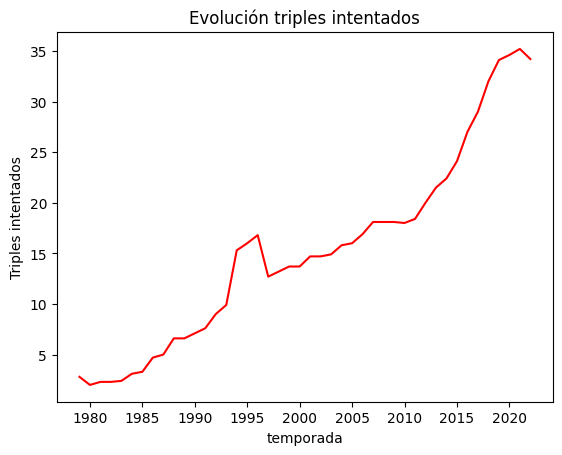

In [10]:
#Numero triples lanzados

numero_triples = sns.lineplot(data=globales_nba, x="Season", y='3PA', color='red')
plt.xlabel("temporada")
plt.ylabel("Triples intentados")
plt.title('Evolución triples intentados')
plt.savefig('../img/evolucion_triple.jpg')

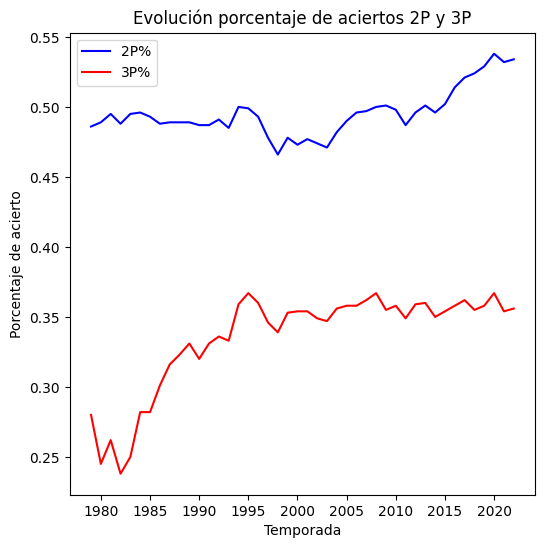

In [9]:
#Evolucion acierto 3 VS 2
plt.figure(figsize=(6,6))
figurinha = sns.lineplot(data=globales_nba, x="Season", y='eFG%', color='blue', label='2P%')
figurinha = figura = sns.lineplot(data=globales_nba, x="Season", y='3P%', color='red', label='3P%')
plt.xlabel("Temporada")
plt.ylabel("Porcentaje de acierto")
plt.title('Evolución porcentaje de aciertos 2P y 3P')
plt.savefig('../img/porcentaje_23.jpg')

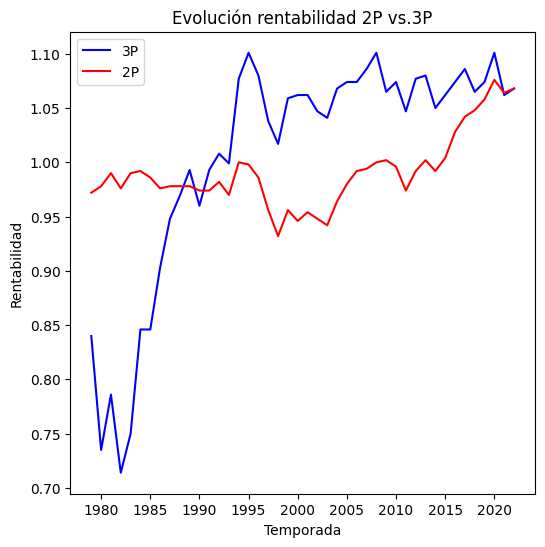

In [8]:
#Evolucion 3P vs 2P
plt.figure(figsize=(6,6))

globales_nba['Rentabilidad_3P'] = globales_nba['3P%'].apply(lambda x: x*3)
globales_nba['Rentabilidad_2P'] = globales_nba['eFG%'].apply(lambda x: x*2)

figurinha = sns.lineplot(data=globales_nba, x="Season", y='Rentabilidad_3P', color='blue', label='3P')
figurinha = figura = sns.lineplot(data=globales_nba, x="Season", y='Rentabilidad_2P', color='red', label='2P')
plt.xlabel("Temporada")
plt.ylabel("Rentabilidad")
plt.title('Evolución rentabilidad 2P vs.3P')
plt.savefig('../img/rentabilidad-23P.jpg')

In [7]:
trace1 = go.Scatter(
    x=globales_nba['Season'],
    y=globales_nba['TRB'],
    xaxis='x1',
    yaxis='y1',
    name = "Rebotes Totales"
)
trace2 = go.Scatter(
    x=globales_nba['Season'],
    y=globales_nba['ORB'],
    xaxis='x2',
    yaxis='y2',
    name = "Rebotes Ofensivos Totales"
)
trace3 = go.Scatter(
    x=globales_nba['Season'],
    y=globales_nba['DRB'],
    xaxis='x3',
    yaxis='y3',
    name = "Rebotes Defensivos Totales"
)
trace4 = go.Scatter(
    x=globales_nba['Season'],
    y=globales_nba['PTS'],
    xaxis='x4',
    yaxis='y4',
    name = "Puntos Totales"
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45],
        anchor='y1'
    ),
    yaxis=dict(
        domain=[0, 0.45],
        anchor='x1'
    ),
    xaxis2=dict(
        domain=[0.55, 1],
        anchor='y2'
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1],
        anchor='x3'
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Evolución de los rebotes totales, defensivos, ofensivos y puntos por temporada'
)
fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [18]:
trace1 = go.Scatter(
    x=globales_nba['Season'],
    y=globales_nba['PF'],
    xaxis='x1',
    yaxis='y1',
    name = "Faltas Personales Totales"
)
trace2 = go.Scatter(
    x=globales_nba['Season'],
    y=globales_nba['TRB'],
    xaxis='x2',
    yaxis='y2',
    name = "Rebotes Totales"
)
trace3 = go.Scatter(
    x=globales_nba['Season'],
    y=globales_nba['AST'],
    xaxis='x3',
    yaxis='y3',
    name = "Asistencias Totales"
)
trace4 = go.Scatter(
    x=globales_nba['Season'],
    y=globales_nba['STL'],
    xaxis='x4',
    yaxis='y4',
    name = "Robos Totales"
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45],
        anchor='y1'
    ),
    yaxis=dict(
        domain=[0, 0.45],
        anchor='x1'
    ),
    xaxis2=dict(
        domain=[0.55, 1],
        anchor='y2'
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1],
        anchor='x3'
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Evolución de las faltas personales, robos, asistencias y rebotes por temporada'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [19]:
trace1 = go.Scatter(
    x=globales_nba['Season'],
    y=globales_nba['FT'],
    xaxis='x1',
    yaxis='y1',
    name = "Tiros libres anotados"
)
trace2 = go.Scatter(
    x=globales_nba['Season'],
    y=globales_nba['FTA'],
    xaxis='x2',
    yaxis='y2',
    name = "Tiros libres intentados"
)
trace3 = go.Scatter(
    x=globales_nba['Season'],
    y=globales_nba['FG'],
    xaxis='x3',
    yaxis='y3',
    name = "Tiros 2P anotados"
)
trace4 = go.Scatter(
    x=globales_nba['Season'],
    y=globales_nba['FGA'],
    xaxis='x4',
    yaxis='y4',
    name = "Tiros 2P intentados"
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45],
        anchor='y1'
    ),
    yaxis=dict(
        domain=[0, 0.45],
        anchor='x1'
    ),
    xaxis2=dict(
        domain=[0.55, 1],
        anchor='y2'
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1],
        anchor='x3'
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Evolución de los tiros de 2P y los tiros libres anotados e intentados'
)
iplot(fig)

In [ ]:
# Creating trace1
trace1 = go.Scatter(
                    x = globales_nba['Season'],
                    y = globales_nba['Rentabilidad_2P'],
                    name = 'Tiro 2P',
                    mode= 'lines',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = globales_nba['Rentabilidad_2P'])

# Creating trace2
trace2 = go.Scatter(
                    x = globales_nba['Season'],
                    y = globales_nba['Rentabilidad_3P'],
                    name = 'Tiro 3P',
                    mode= 'lines',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text = globales_nba['Rentabilidad_3P'])

data = [trace1, trace2]

layout = dict(title = 'Rentabilidad tiro 2P vs. tiro 3P',
             xaxis= dict(title= 'Tiro',ticklen=5, ticks="outside", tickson="boundaries",), 
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [31]:
# Creating trace1
trace1 = go.Scatter(
                    x = globales_nba['Season'],
                    y = globales_nba['3PA'],
                    name = 'Triples intentados',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = globales_nba['3PA'])

# Creating trace2
trace2 = go.Scatter(
                    x = globales_nba['Season'],
                    y = globales_nba['3P'],
                    name = 'Triples anotados',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text = globales_nba['3P'])

data = [trace1, trace2]

layout = dict(title = 'Evolución triples anotados e intentados',
             xaxis= dict(title= 'Tiro',ticklen=5, ticks="outside", tickson="boundaries",), 
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)